# CNN(畳み込みニューラルネットワーク)によるCIFAR10 分類

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

In [63]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [64]:
nb_classes = 10
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
print(y_train.shape)


(50000, 10)


In [65]:
x_train = x_train/255.0
x_test = x_test/255.0

In [66]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

nb_classes=10

# CNNを構築
model = Sequential()

# conv 3*3 -> 32 channels
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
# Max pooling 2*2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 全結合 512
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 全結合 10
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_18 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)        18496     
__________

## データオーギュメンテーション

In [67]:
train_datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        rotation_range=10,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=False,
        zoom_range=[.8, 1])
#         channel_shift_range=30,
#         fill_mode='reflect')

train_generator = train_datagen.flow(x_train, y_train, batch_size=100, seed = 13)
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow(x_test, y_test, batch_size=100, seed = 13)

In [ ]:
# augmentation 用
batch_size = 1000
nb_epoch = 50
history = model.fit_generator(train_generator,
                    steps_per_epoch=500,
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=800,
                    verbose=1)

Epoch 1/10
500/500 [==============================] - 465s - loss: 1.8921 - acc: 0.2716 - val_loss: 1.5000 - val_acc: 0.4483
Epoch 2/10
500/500 [==============================] - 465s - loss: 1.5615 - acc: 0.4206 - val_loss: 1.3030 - val_acc: 0.5377
Epoch 3/10
500/500 [==============================] - 471s - loss: 1.3855 - acc: 0.4953 - val_loss: 1.0972 - val_acc: 0.5984
Epoch 4/10
500/500 [==============================] - 468s - loss: 1.2800 - acc: 0.5402 - val_loss: 0.9986 - val_acc: 0.6390
Epoch 5/10
500/500 [==============================] - 457s - loss: 1.2042 - acc: 0.5692 - val_loss: 0.9754 - val_acc: 0.6501
Epoch 6/10
500/500 [==============================] - 458s - loss: 1.1485 - acc: 0.5917 - val_loss: 0.9083 - val_acc: 0.6765
Epoch 7/10
500/500 [==============================] - 458s - loss: 1.1060 - acc: 0.6099 - val_loss: 0.9456 - val_acc: 0.6690
Epoch 8/10
500/500 [==============================] - 458s - loss: 1.0712 - acc: 0.6217 - val_loss: 0.8274 - val_acc: 0.7092


In [ ]:
batch_size = 1000
nb_epoch = 50
history = model.fit(X_train, Y_train,
                            batch_size=batch_size,
                            epochs=nb_epoch,
                            verbose=1,
                            validation_data=(X_test, Y_test),
                            shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 247s - loss: 2.1499 - acc: 0.1767 - val_loss: 1.9561 - val_acc: 0.2589
Epoch 2/50
50000/50000 [==============================] - 242s - loss: 1.8436 - acc: 0.3011 - val_loss: 1.7407 - val_acc: 0.3735
Epoch 3/50
50000/50000 [==============================] - 242s - loss: 1.6359 - acc: 0.3953 - val_loss: 1.4667 - val_acc: 0.4628
Epoch 4/50
50000/50000 [==============================] - 242s - loss: 1.4599 - acc: 0.4617 - val_loss: 1.3290 - val_acc: 0.5170
Epoch 5/50
50000/50000 [==============================] - 242s - loss: 1.3622 - acc: 0.5013 - val_loss: 1.2646 - val_acc: 0.5410
Epoch 6/50
50000/50000 [==============================] - 242s - loss: 1.2473 - acc: 0.5475 - val_loss: 1.1573 - val_acc: 0.5846
Epoch 7/50
50000/50000 [==============================] - 242s - loss: 1.1787 - acc: 0.5757 - val_loss: 1.0544 - val_acc: 0.6221
Epoch 8/50
50000/50000 [=======================

In [40]:
loss, acc = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', loss)
print('Test acc:', acc)

10000/10000 [==============================] - 13s    
Test loss: 0.558366044044
Test acc: 0.817


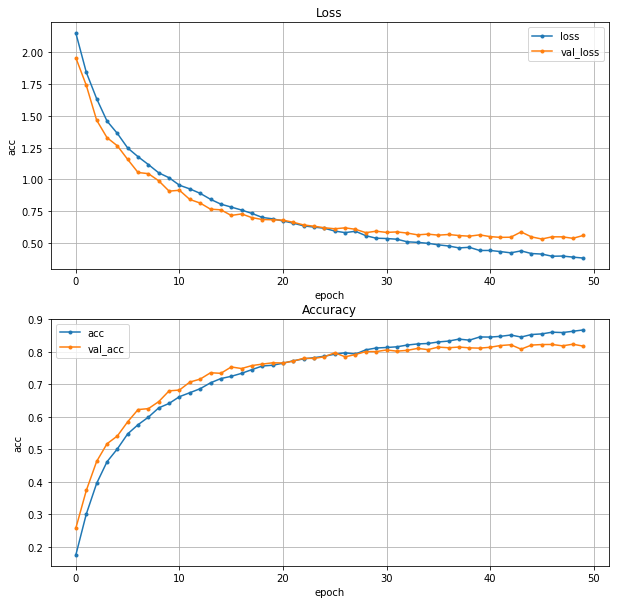

In [41]:
# 学習の様子をプロット
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Loss')
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

# plt.savefig('rms_cifar3_50epochs.png')

(1, 32, 32, 3)
[[  8.93947458e-08   9.99864221e-01   1.89752527e-07   1.39229428e-08
    7.42625673e-07   4.44137394e-09   7.13554618e-05   3.07426490e-07
    2.15284626e-06   6.09133094e-05]] 
 automobile


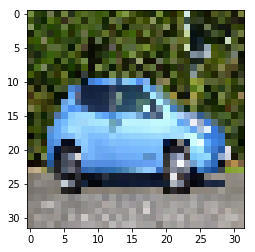

In [33]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#Jupyterでインライン表示するための宣言
%matplotlib inline 

#画像の読み込み
test = Image.open("./car1.jpg")


# gray_img = im.convert('L')
test = test.resize((32,32))
plt.imshow(test)

# #画像をarrayに変換
test_array = np.array(test, 'f')
test_array /= 255.
test_array = test_array[np.newaxis]
print(test_array.shape)

# im_list = 1 - im_list/256

res = np.argmax(model.predict(test_array)[0])
# l_dict = {e:i.decode('utf-8') for e,i in enumerate(label_names)}

print(model.predict(test_array),'\n',select_labels[res])